# Tarea 6 - Serie de Taylor y Polinomios de Lagrange  
**Nombre:** Alexis Bautista  
**Fecha de entrega:** 27 de noviembre de 2024  
**Paralelo:** GR1CC  
**Enlace de GitHub:** https://github.com/alexis-bautista/Tarea06-MN.git

Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:

Sabemos que:

**Serie de Taylor:** $f(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \frac{f'''(a)}{3!}(x - a)^3 + \ldots + \frac{f^n(a)}{n!}(x - a)^ n = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x - a)^n$

donde su polinomio es: $P(x) = a_n x^n + a_{n-1} x^{n-1} + \ldots + a_1 x + a_0$

**Polinomio de Lagrange:** $P(x) = f(x_0)L_0(x)+\ldots + f(x_n)L_n(x)$  
$P(x) = y_0L_0(x)+y_1L_1(x)+ \ldots +y_nL_n(x)$  
$P(x) = \sum_{k=0}^{n} f(x_k) L_k(x)$

donde $L_k(x)$ se obtiene de: $L_k(x) = \frac{(x - x_0)(x - x_1) \cdots (x - x_{k-1})(x - x_{k+1}) \cdots (x - x_n)}{(x_k - x_0)(x_k - x_1) \cdots (x_k - x_{k-1})(x_k - x_{k+1}) \cdots (x_k - x_n)}$  
$=\prod_{\substack{i=0 \\ i \neq k}}^{n} \frac{(x - x_i)}{(x_k - x_i)}$

1. $$\frac{1}{25*x^2+1},x_0=0$$

In [120]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 1/(25*x**2+1)

Funcion para calcular el polinomio de taylor

In [121]:
def serie_Taylor(func, x0, orden, x_vals):
    derivadas = [func(x0)]  # primera derivada (función evaluada en x0)
    h = 1e-5  # Incremento pequeño para derivadas numéricas
    
    # Calcular derivadas hasta el orden deseado
    for n in range(1, orden):
        derivada = (func(x0 + h) - func(x0 - h)) / (2 * h)
        derivadas.append(derivada)
        h /= 2  # Reducir el incremento para mayor precisión en derivadas superiores
    
    # Construir el polinomio de Taylor
    result = np.zeros_like(x_vals)
    for n in range(orden):
        result += derivadas[n] * ((x_vals - x0)**n) / math.factorial(n)
    
    return result


Funcion para calcular el polinomio de Lagrange

In [122]:
def polinomio_Lagrange(x_points, y_points, x_vals):
    n = len(x_points)
    result = np.zeros_like(x_vals)
    
    for i in range(n):
        term = np.ones_like(x_vals)
        for j in range(n):
            if i != j:
                term *= (x_vals - x_points[j]) / (x_points[i] - x_points[j])
        result += term * y_points[i]
    
    return result

In [123]:
# Parámetros de la función 1
x_vals_f1 = np.linspace(-1, 1, 500)
x0_f1 = 0
max_orden = 5

# Aproximaciones de Taylor para f1
aproximaciones_taylor_f1 = [serie_Taylor(f1, x0_f1, orden, x_vals_f1) for orden in range(1, max_orden + 1)]

print("\n--- Resultados de Aproximaciones de Taylor para f(x) ---")
for i, taylor_f1 in enumerate(aproximaciones_taylor_f1):
    print(f"Orden {i + 1}:")
    print(taylor_f1[:10])  # Imprimir los primeros 10 valores para evitar saturar la salida

# Puntos para Lagrange para f1
puntos_lagrange_f1 = np.linspace(-1, 1, max_orden + 1)
aproximaciones_lagrange_f1 = polinomio_Lagrange(
    puntos_lagrange_f1, f1(puntos_lagrange_f1), x_vals_f1
)

print("\n--- Resultados del Polinomio de Lagrange para f(x) ---")
print(aproximaciones_lagrange_f1[:10])  # Imprimir los primeros 10 valores


--- Resultados de Aproximaciones de Taylor para f(x) ---
Orden 1:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Orden 2:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Orden 3:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Orden 4:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Orden 5:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

--- Resultados del Polinomio de Lagrange para f(x) ---
[ 0.03846154  0.03315387  0.02802043  0.02305938  0.01826889  0.01364711
  0.00919223  0.00490243  0.0007759  -0.00318917]


2. $$\arctan{x}, x_0 =1$$

In [111]:
def f2(x):
    return np.arctan(x)

In [112]:
# parametros 
x_vals_f2 = np.linspace(-1, 3, 500)
x0_f2 = 1
max_orden = 5

# Aproximaciones de Taylor
aproximaciones_taylor_f2 = [serie_Taylor(f2, x0_f2, orden, x_vals_f2) for orden in range(1, max_orden + 1)]

print("\n--- Resultados de Aproximaciones de Taylor para f(x) ---")
for i, taylor_f2 in enumerate(aproximaciones_taylor_f2):
    print(f"Orden {i + 1}:")
    print(taylor_f2[:10])  # Imprimir los primeros 10 valores para evitar saturar la salida
    
# Puntos para Lagrange
puntos_lagrange_f2 = np.linspace(-1, 1, max_orden + 1)
aproximaciones_lagrange_f2 = polinomio_Lagrange(
    puntos_lagrange_f2, f2(puntos_lagrange_f2), x_vals_f2
)

print("\n--- Resultados del Polinomio de Lagrange para f(x) ---")
print(aproximaciones_lagrange_f2[:10])  # Imprimir los primeros 10 valores


--- Resultados de Aproximaciones de Taylor para f(x) ---
Orden 1:
[0.78539816 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816
 0.78539816 0.78539816 0.78539816 0.78539816]
Orden 2:
[-0.21460184 -0.21059382 -0.2065858  -0.20257779 -0.19856977 -0.19456176
 -0.19055374 -0.18654572 -0.18253771 -0.17852969]
Orden 3:
[0.78539816 0.78140621 0.77744639 0.77351869 0.76962313 0.76575969
 0.76192838 0.7581292  0.75436214 0.75062722]
Orden 4:
[0.1187315  0.12272349 0.12668362 0.13061213 0.13450928 0.13837534
 0.14221055 0.14601519 0.14978949 0.15353373]
Orden 5:
[0.45206483 0.45074485 0.44945673 0.44820024 0.44697511 0.4457811
 0.44461795 0.44348542 0.44238327 0.44131125]

--- Resultados del Polinomio de Lagrange para f(x) ---
[-0.78539816 -0.78103491 -0.77667118 -0.77230514 -0.76793494 -0.76355884
 -0.75917509 -0.75478201 -0.75037796 -0.74596136]


**Grafica de las aproximaciones**

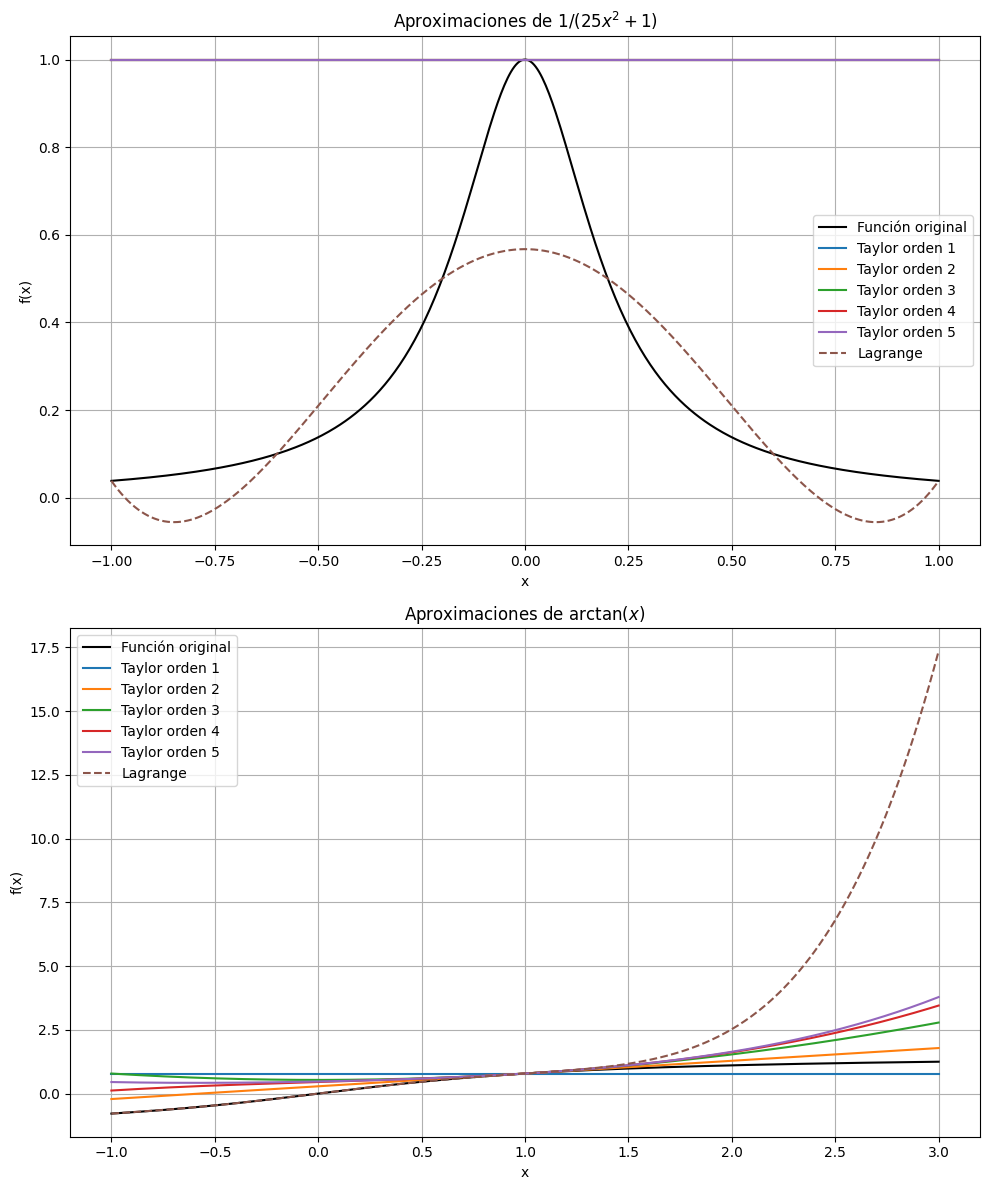

In [124]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# --- Función 1 ---
axs[0].plot(x_vals_f1, f1(x_vals_f1), label='Función original', color='black')
for i, taylor_f1 in enumerate(aproximaciones_taylor_f1):
    axs[0].plot(x_vals_f1, taylor_f1, label=f'Taylor orden {i + 1}')
axs[0].plot(x_vals_f1, aproximaciones_lagrange_f1, label='Lagrange', linestyle='--')
axs[0].set_title('Aproximaciones de $1/(25x^2 + 1)$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].legend()
axs[0].grid()

# --- Función 2 ---
axs[1].plot(x_vals_f2, f2(x_vals_f2), label='Función original', color='black')
for i, taylor_f2 in enumerate(aproximaciones_taylor_f2):
    axs[1].plot(x_vals_f2, taylor_f2, label=f'Taylor orden {i + 1}')
axs[1].plot(x_vals_f2, aproximaciones_lagrange_f2, label='Lagrange', linestyle='--')
axs[1].set_title('Aproximaciones de $\\arctan(x)$')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

## Comprobacion de polinomio de taylor 

Para comprobar que el codigo anteriormente esta correctamente implementado usamos la libreria SymPy para calcular las series de Taylor

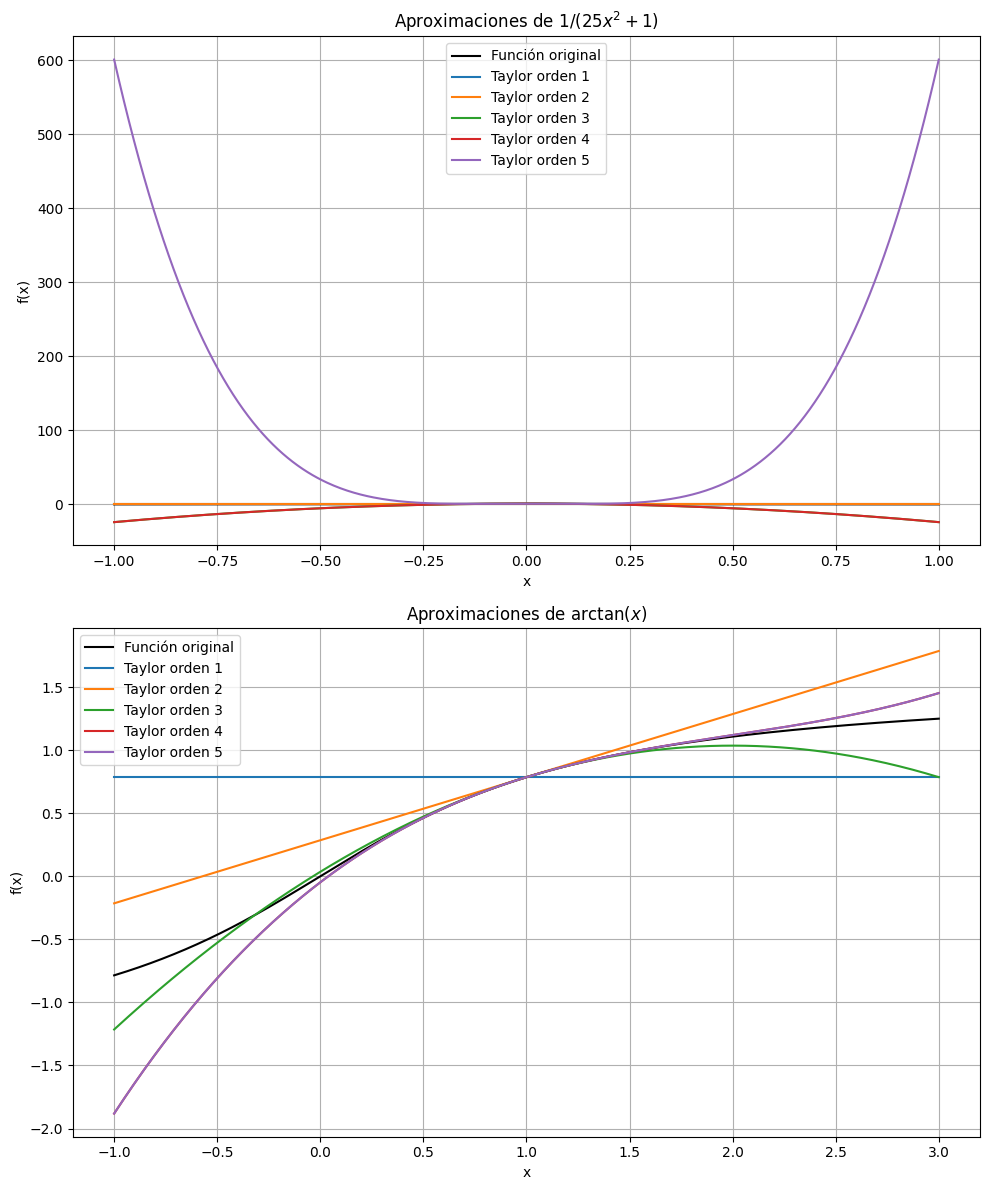

In [102]:
import sympy as sp
# Definir variables simbólicas
x = sp.symbols('x')

# Funciones dadas
f1 = 1 / (25 * x**2 + 1)  # Primera función
f2 = sp.atan(x)           # Segunda función

# Puntos de expansión
x0_f1 = 0
x0_f2 = 1

# Grado máximo de las aproximaciones
max_order = 5

# Intervalos de evaluación
x_vals_f1 = np.linspace(-1, 1, 500)
x_vals_f2 = np.linspace(-1, 3, 500)

# Almacenar aproximaciones para graficar
approximations_f1 = []
approximations_f2 = []

# Generar series de Taylor
for order in range(1, max_order + 1):
    # Taylor para f1 alrededor de x0_f1
    taylor_f1 = sp.series(f1, x, x0_f1, order).removeO()
    approximations_f1.append(taylor_f1)
    
    # Taylor para f2 alrededor de x0_f2
    taylor_f2 = sp.series(f2, x, x0_f2, order).removeO()
    approximations_f2.append(taylor_f2)

# Graficar las aproximaciones
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# --- Función 1 ---
axs[0].plot(x_vals_f1, [1 / (25 * x**2 + 1) for x in x_vals_f1], label='Función original', color='black')
for i, taylor_f1 in enumerate(approximations_f1):
    y_vals = [taylor_f1.subs(x, xi) for xi in x_vals_f1]
    axs[0].plot(x_vals_f1, y_vals, label=f'Taylor orden {i + 1}')
axs[0].set_title('Aproximaciones de $1/(25x^2 + 1)$')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].legend()
axs[0].grid()

# --- Función 2 ---
axs[1].plot(x_vals_f2, [np.arctan(x) for x in x_vals_f2], label='Función original', color='black')
for i, taylor_f2 in enumerate(approximations_f2):
    y_vals = [taylor_f2.subs(x, xi) for xi in x_vals_f2]
    axs[1].plot(x_vals_f2, y_vals, label=f'Taylor orden {i + 1}')
axs[1].set_title('Aproximaciones de $\\arctan(x)$')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()